In [63]:
import numpy as np
import pickle as pkl
import glob
import matplotlib.pyplot as plt

In [64]:
path = './out_christmas/'
animal = 'ST264'
dayN = 2
day_name = 'Day{}'.format(dayN)
exp_pref = '{}_{}'.format(animal,day_name)
beh = 5 #number of behavioural variables
list_files = glob.glob(path+exp_pref+"*.pkl")

In [65]:
list_files

[]

### First merge pkls

In [4]:
#del(data)
def fix_zero_times(entry):
    # this function deletes stopped or broken runs
    if (entry!=None):
        if (entry[-1]==0):# & (entry[1]!='Independence'):
            return None
        else:
            return entry
    else:
        return None

with open(list_files[0],'rb') as f:
    new_data = pkl.load(f)
data_pkls = np.empty_like(new_data) #create an empty array
for file in list_files:
    with open(file,'rb') as f:
        new_data = pkl.load(f)
        new_data = np.array([[fix_zero_times(j) for j in i] for i in new_data])
        # it is important to fix the data(above) before adding to the results
        #check rewrites
        rewrite_rule = (new_data!=None) & (data_pkls!=None)
        rewrite_new = new_data[rewrite_rule]
        if len(rewrite_new)>0:
            overwrite = data_pkls[rewrite_rule]
            X,Y = np.mgrid[0:new_data.shape[0],0:new_data.shape[1]]
            for old_el,new_el,x,y in zip(overwrite,rewrite_new,X[rewrite_rule],Y[rewrite_rule]):
                print('Overwrite {}({}) with {}({}) at {}-{}'.format(
                    old_el[1],old_el[2],
                    new_el[1],new_el[2],
                    x-beh,y-beh
                    ))
                print(new_el[-1])
        #add results
        data_pkls[new_data!=None] = new_data[new_data!=None]

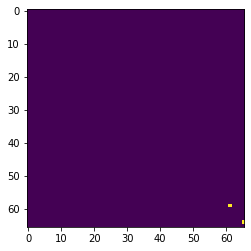

In [5]:
plt.imshow((data_pkls!=None)*1.0)

### Next check last records on a model list

In [17]:
#parse text results

def neuron_ids(string):
    arr = str.split(string,sep='-')
    n1,n2 = 1,1
    which = 0
    for a in arr:
        try:
            n = int(a)
            if which:
                n2*=n
            else:
                n1*=n
                which=1
        except ValueError:
            if which:
                n2 = -1
            else:
                n1 = -1
    return n1,n2

import csv

beh = 5
NN = data_pkls.shape[0]-beh
data_txt = np.empty((NN+beh,NN+beh),dtype=object)

with open(path+animal+'_'+day_name+'_model_list.txt','r') as f:
    next(f) # skip headings
    reader=csv.reader(f,delimiter='\t')
    for res,waic,time in reader:
        neuron, copula = str.split(res)
        n1,n2 = neuron_ids(neuron)
        if time!=0:
            data_txt[n1+beh,n2+beh] = [copula,waic,time,n1,n2]

In [ ]:
plt.imshow((data_txt!=None)*1.0)

In [ ]:
Frank = data_txt[0,1]
Frank[1] = '885'
Frank[2] = '720'
Frank[4] = -3
data_txt[0,2] = Frank

In [ ]:
for i in range(61+5-1):
    for j in range(i+1,61+5):
        if (data_txt[i,j]==None) & (i!=57+5) & (j!=57+5):
            print(i-5,j-5)

In [40]:
#repair lost pkls
from select_copula import elements
from utils import get_copula_name_string

def create_copula_dict(elements):
    d = {}
    for el1 in elements:
        d[get_copula_name_string([el1])] = [el1]
        for el2 in elements:
            d[get_copula_name_string([el1,el2])] = [el1,el2]
            for el3 in elements:
                d[get_copula_name_string([el1,el2,el3])] = [el1,el2,el3]
                for el4 in elements:
                    d[get_copula_name_string([el1,el2,el3,el4])] = [el1,el2,el3,el4]
    return d

copula_dict = create_copula_dict(elements)


for n1 in range(0,NN-1+beh):
    for n2 in range(n1+1,NN+beh):
        if (data_pkls[n1,n2]==None) & (data_txt[n1,n2]!=None):
            data_pkls[n1,n2] = [copula_dict[data_txt[n1,n2][0]],data_txt[n1,n2][0],
                                float(data_txt[n1,n2][1]), int(data_txt[n1,n2][2])]
        elif (data_pkls[n1,n2]!=None):
            if data_pkls[n1,n2][1]!=data_txt[n1,n2][0]:
                print('What? {}-{}'.format(n1,n2))

### Try to collect individual pkls

In [41]:
data_sing = np.empty((NN+beh,NN+beh),dtype=object)

list_files = glob.glob(path+exp_pref+"/*.pkl")

for file in list_files:
    n1, n2 = neuron_ids(str.split(str.split(file,sep='/')[-1],sep='.pkl')[0])
    with open(file,'rb') as f:
        try:
            data_sing[n1+beh,n2+beh] = pkl.load(f)
        except EOFError as error:
            print(n1,n2,error)

57 55 Ran out of input
57 39 Ran out of input
57 7 Ran out of input
57 12 Ran out of input
57 10 Ran out of input
57 -3 Ran out of input
57 20 Ran out of input
57 27 Ran out of input
57 34 Ran out of input
57 42 Ran out of input
57 40 Ran out of input
57 30 Ran out of input
57 49 Ran out of input
57 47 Ran out of input
57 23 Ran out of input
57 6 Ran out of input
57 57 Ran out of input
57 51 Ran out of input
57 2 Ran out of input
57 44 Ran out of input
57 45 Ran out of input
57 4 Ran out of input
57 54 Ran out of input
57 19 Ran out of input
57 31 Ran out of input
57 35 Ran out of input
57 -2 Ran out of input
57 1 Ran out of input
57 32 Ran out of input
57 17 Ran out of input
57 41 Ran out of input
57 -5 Ran out of input
57 16 Ran out of input
57 0 Ran out of input
57 5 Ran out of input
57 33 Ran out of input
57 8 Ran out of input
57 50 Ran out of input
57 13 Ran out of input
57 38 Ran out of input
57 3 Ran out of input
57 18 Ran out of input
57 46 Ran out of input
57 52 Ran out of inp

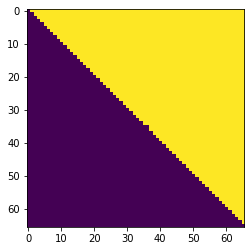

In [27]:
plt.imshow((data_sing!=None)*1.0)

In [51]:
from utils import get_copula_name_string

for pkls,txt,sing in zip(data_pkls.flatten(),data_txt.flatten(),data_sing.flatten()):
    if pkls!=None:
        if sing!=None:
            if get_copula_name_string(pkls[0])!=get_copula_name_string(sing):
                #print(sing)
                print(get_copula_name_string(sing),get_copula_name_string(pkls[0]))
        else:
            print('Single pkl missing for ',txt[-2:])
    elif sing!=None:
        print('Record about pkl missing ')

Record about pkl missing 
Single pkl missing for  [30, 31]


In [61]:
import torch

torch.ones(1)*1e39

tensor([inf])

## Now check that everything is merged correctly and save

In [ ]:
def check_data_merge(data_pkls, data_txt):
    err = 0
    for pkls,txt in zip(data_pkls.flatten(), data_txt.flatten()):
        if pkls!=None:
            assert txt!=None
            if pkls[1]!=txt[0]:
                err = 1
        #    print(pkl[1],txt[0],pkl[2],txt[1],txt[-2],txt[-1])
    return err

In [ ]:
def try_copy(source,target):
    try:
        os.path.exists(source)
    except FileExistsError as error:
        print(error)
        return 0
    finally:
        os.popen('cp {} {}'.format(source,target)) 
        return 1
        
def copy_all_weights(data,in_dir,out_dir):
    for i in range(data.shape[0]):
        for j in range(i+1,data.shape[1]):
            if data[i,j]!=None:
                if data[i,j][1]!='Independence':
                    name = '{}-{}'.format(i-beh,j-beh)
                    source = '{}/model*_{}.pth'.format(in_dir,name)
                    target = '{}/model_{}.pth'.format(out_dir,name)
                    assert try_copy(source,target)
                    source = '{}/best*_{}.png'.format(in_dir,name)
                    target = '{}/figs/best_{}.png'.format(out_dir,name)
                    assert try_copy(source,target)
    with open(out_dir+'/summary.pkl','wb') as f:
        pkl.dump(data,f)

In [ ]:
import os

upper_ones = np.triu(np.ones(data_pkls.shape[0]))-np.diag(np.ones(data_pkls.shape[0]))

out_dir = '../models/'+exp_pref
try:
    os.mkdir(out_dir)
    os.mkdir(out_dir+'/figs/')
except FileExistsError as error:
    list_files = glob.glob(out_dir+"*.p*")
    if len(list_files):
        raise Exception("Folder not empty, save nothing")

assert check_data_merge(data_pkls, data_txt)==0
assert np.all(1*(data_pkls!=None) == upper_ones) #check that all results exist
# if folder is empty and all merged well -- save
copy_all_weights(data_pkls,path+exp_pref,out_dir)